In [111]:
# CART Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,scale
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [112]:
data = pd.read_csv('data.csv')
data = data.dropna()
dms = pd.get_dummies(data[['League', 'Division', 'NewLeague']])
y = data["Salary"]
X_ = data.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [113]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [114]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=10)
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

C:\Users\polat\AppData\Local\Temp\ipykernel_5088\1599044925.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
c:\Users\polat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Maaş (Salary)')

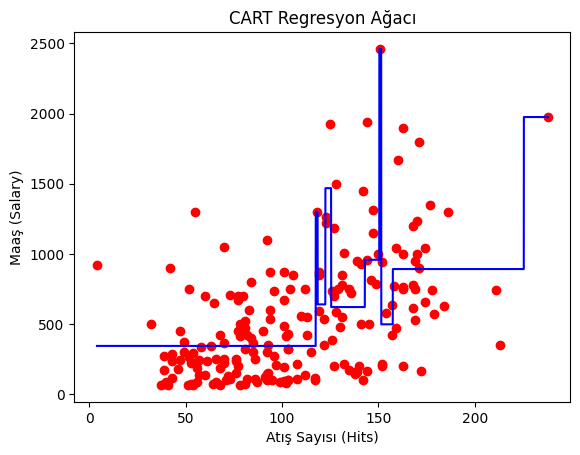

In [115]:
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X_train, y_train, color='red')
plt.plot(X_grid, cart_model.predict(X_grid), color='blue')
plt.title('CART Regresyon Ağacı')
plt.xlabel('Atış Sayısı (Hits)')
plt.ylabel('Maaş (Salary)')

In [116]:
# Tahmin
y_pred = cart_model.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))

MSE:  236532.3646511816


In [117]:
data = pd.read_csv('data.csv')
data = data.dropna()
dms = pd.get_dummies(data[['League', 'Division', 'NewLeague']])
y = data["Salary"]
X_ = data.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [118]:
cart_model = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))

MSE:  193562.31393004546


#### MODEL TUNİNG

In [119]:
cart_model = DecisionTreeRegressor(max_depth=10).fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))

MSE:  198589.84646355096


In [120]:
?cart_model

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor(max_depth=10)
File:        c:\users\polat\appdata\local\programs\python\python311\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss using the median of each terminal node, and "poisson" which
    uses reduction in Poisson deviance to find splits.

    .. versionadded

In [121]:
params = {'max_depth': [2,3,4,5,10,20],
        'min_samples_split': [2,5,10,30,50,100]}

cart_model = DecisionTreeRegressor()

In [122]:
cart_cv_model = GridSearchCV(cart_model, params, cv=10).fit(X_train, y_train)

In [123]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 50}

In [124]:
cart_cv_model = DecisionTreeRegressor(max_depth=5 , min_samples_split=50).fit(X_train, y_train)
y_pred = cart_cv_model.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))

MSE:  130384.32033977585


In [125]:
?cart_model

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor()
File:        c:\users\polat\appdata\local\programs\python\python311\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss using the median of each terminal node, and "poisson" which
    uses reduction in Poisson deviance to find splits.

    .. versionadded:: 0.18
    